# Analisis Esplorativa de los Datos (EDA) para una empresa de Telecomunicaciones

## Introduccion
En este notebook, haremos un proceso de ETL (limpieza de datos) con siguiente exploracion de datos por comprender el comportamiento del xector de 
telecomunicaciones a nivel Nacional (Argentina).

## Carga de datos

In [175]:
import pandas as pd
import seaborn as sns
# Herramientas esteticas de seaborn
sns.set(style="whitegrid")
import matplotlib.pyplot as plt

In [176]:
#importamos nuestro file excel completo de todas las hojas
all_sheets = pd.read_excel('Internet.xlsx', sheet_name=None)

print("Nombre de las hojas:", all_sheets.keys())

Nombre de las hojas: dict_keys(['Acc_vel_loc_sinrangos', 'Velocidad_sin_Rangos', 'Velocidad % por prov', 'Totales VMD', 'Accesos_tecnologia_localidad', 'Totales Accesos Por Tecnología', 'Accesos Por Tecnología', 'Dial-BAf', 'Totales Dial-BAf', 'Penetración-poblacion', 'Penetracion-hogares', 'Penetracion-totales', 'Totales Accesos por velocidad', 'Accesos por velocidad', 'Ingresos'])


In [177]:
# Ahora `all_sheets` es un diccionario donde la clave es el nombre de la hoja y el valor su DF correspondiente.
for sheet_name, df in all_sheets.items():
    print(f"Foglio: {sheet_name}")
    print(df.head())

# Creamos variables separadas para cada DF
vel_perc = all_sheets['Velocidad % por prov']
tec = all_sheets['Accesos Por Tecnología']
pen_pob = all_sheets['Penetración-poblacion']
pen_hog = all_sheets['Penetracion-hogares']
acc_vel = all_sheets['Accesos por velocidad']
ingresos = all_sheets['Ingresos']


Foglio: Acc_vel_loc_sinrangos
      Provincia     Partido          Localidad Link Indec  Otros  0,256 Mbps  \
0  BUENOS AIRES  25 de Mayo         25 de Mayo    6854100    NaN         NaN   
1  BUENOS AIRES  25 de Mayo    Agustín Mosconi    6854010    NaN         NaN   
2  BUENOS AIRES  25 de Mayo          Del Valle    6854020    NaN         NaN   
3  BUENOS AIRES  25 de Mayo          Ernestina    6854030    NaN         NaN   
4  BUENOS AIRES  25 de Mayo  Gobernador Ugarte    6854040    NaN         NaN   

   0,5 Mbps  0,512 Mbps  0,75 Mbps  1 Mbps  ...  540 Mbps  600 Mbps  680 Mbps  \
0       2.0         NaN       19.0     NaN  ...       NaN       NaN       NaN   
1       NaN         NaN        NaN     NaN  ...       NaN       NaN       NaN   
2       1.0         NaN        NaN     NaN  ...       NaN       NaN       NaN   
3       NaN         NaN        NaN     NaN  ...       NaN       NaN       NaN   
4       NaN         NaN        NaN     NaN  ...       NaN       NaN       NaN   

  

### Exploro el df vel_perc

In [178]:
vel_perc.head()

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2023,4,Buenos Aires,158.49
1,2023,4,Capital Federal,234.44
2,2023,4,Catamarca,89.40
3,2023,4,Chaco,107.14
4,2023,4,Chubut,20.29


In [179]:
vel_perc.dtypes

Año                         int64
Trimestre                   int64
Provincia                  object
Mbps (Media de bajada)    float64
dtype: object

In [180]:
vel_perc.describe()

,Año,Trimestre,Mbps (Media de bajada)
count,960.000000,960.000000,960.000000
mean,2018.500000,2.500000,21.615685
std,2.873778,1.118617,29.340345
min,2014.000000,1.000000,2.573729
25%,2016.000000,1.750000,4.685122
50%,2018.500000,2.500000,8.885746
75%,2021.000000,3.250000,25.682270
max,2023.000000,4.000000,234.440000


Del describe podemos evaluar que la diferencia entre min y max de media de bajada es bastante impactante: 2.5 min vs 234.44 max. Esto podria ser debido al tipo de tecnologia usada. 

In [181]:
vel_perc.isnull().sum()

Año                       0
Trimestre                 0
Provincia                 0
Mbps (Media de bajada)    0
dtype: int64

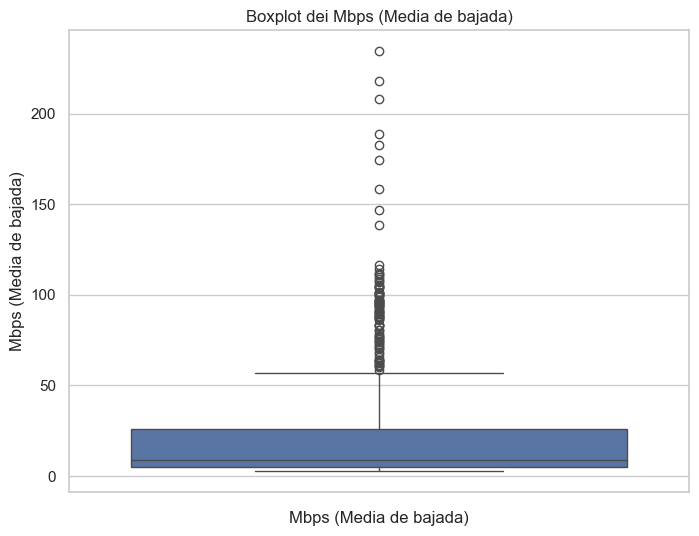

In [182]:
# Creazione del boxplot per la colonna 'Mbps (Media de bajada)'
plt.figure(figsize=(8, 6))
sns.boxplot(data=vel_perc['Mbps (Media de bajada)'])
plt.title('Boxplot dei Mbps (Media de bajada)')
plt.xlabel('Mbps (Media de bajada)')
plt.show()

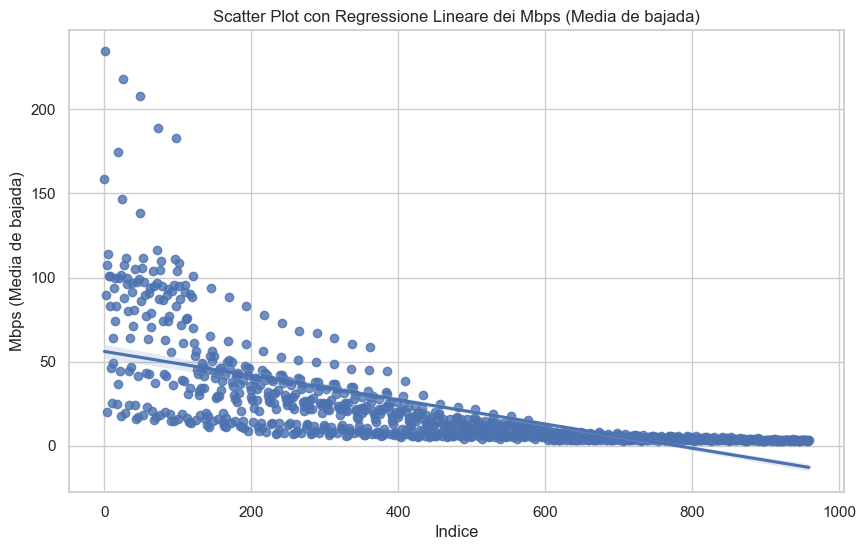

In [183]:
plt.figure(figsize=(10, 6))
sns.regplot(x=vel_perc.index, y='Mbps (Media de bajada)', data=vel_perc)
plt.title('Scatter Plot con Regressione Lineare dei Mbps (Media de bajada)')
plt.xlabel('Indice')
plt.ylabel('Mbps (Media de bajada)')
plt.show()


Se puede ver claramente en los dos graficos que hay muchos outliers, o sea valores que difieren bastante de la media de bajada. Esto podria ser por las zonas mas remotas donde el internet no accede bien. Seria interesante notar cuales son estas zonas:
---Crear un grafico que pongfa en relacion media de bajada y provincia----

C:\Users\giada\AppData\Local\Temp\ipykernel_2648\247405131.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Provincia', y='Mbps (Media de bajada)', data=vel_perc, palette="viridis")


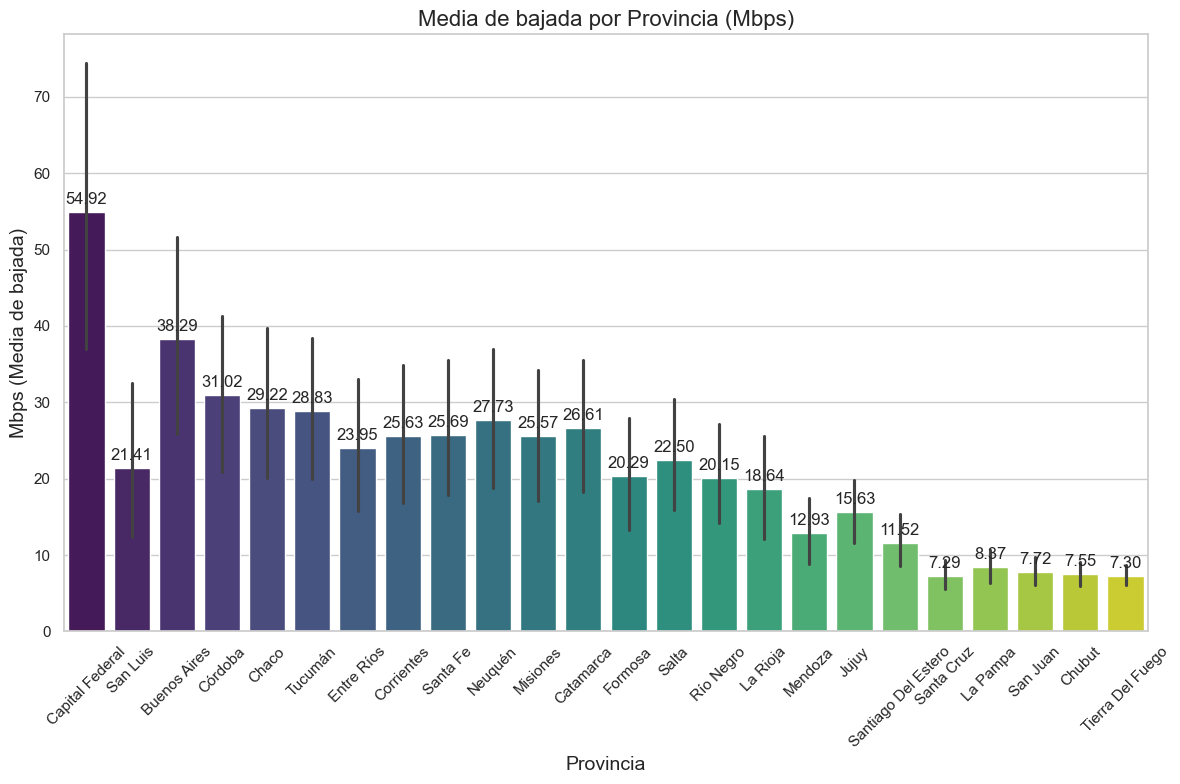

In [184]:
#ordenar valores
vel_perc = vel_perc.sort_values('Mbps (Media de bajada)', ascending=False).reset_index(drop=True)

# Creacion del grafico de barras
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='Provincia', y='Mbps (Media de bajada)', data=vel_perc, palette="viridis")

# valores en las barras
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.2f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')

# Titulos y labels
plt.title('Media de bajada por Provincia (Mbps)', fontsize=16)
plt.xlabel('Provincia', fontsize=14)
plt.ylabel('Mbps (Media de bajada)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

# Muestra il grafico
plt.show()

como se podia esperar, se puede ver que en capital federal la media de bajada destaca notevolmente respecto a otras provincias como santa Cruz o Tierra del Fuego. Que se podria hacer para llegar con una buena media tambien allà? 
---Quizas explorar otros dataframe para ver que tecnologias se usan por provicncia para hacer consideraciones---

In [186]:
vel_perc.to_csv('vel_perc.csv', index=False)

### Quiero crear un kpi que incremente la (media de bajada) en el proximo ano, hasta la media nacional, en las provincias que no llegan a la media

In [187]:
# Filtrar los datos para el año 2023
vel_perc_2023 = vel_perc[vel_perc['Año'] == 2023]

# Calcular la media nacional de Mbps para el año 2023
media_nacional_mbps_2023 = vel_perc_2023['Mbps (Media de bajada)'].mean()
media_nacional_mbps_2023


np.float64(77.78020833333333)

In [188]:
# Filtrar los datos para el año 2023
vel_perc_2023 = vel_perc[vel_perc['Año'] == 2023]

# Calcular la media nacional de Mbps para el año 2023
media_nacional_mbps_2023 = vel_perc_2023['Mbps (Media de bajada)'].mean()

# Filtrar las provincias cuya media de bajada es menor que la media nacional en 2023
provincias_por_debajo_media_2023 = vel_perc_2023[vel_perc_2023['Mbps (Media de bajada)'] < media_nacional_mbps_2023]

# Establecer la meta para el próximo año como la media nacional de 2023
provincias_por_debajo_media_2023.loc[:, 'Meta para 2024'] = media_nacional_mbps_2023

# Mantener solo los valores únicos de las provincias
provincias_por_debajo_media_2023_unicas = provincias_por_debajo_media_2023.drop_duplicates(subset=['Provincia'])

# Mostrar el resultado
print(provincias_por_debajo_media_2023)
vel_perc_2023.head()


      Año  Trimestre            Provincia  Mbps (Media de bajada)  \
68   2023          2              Formosa                   77.32   
69   2023          1                Salta                   76.85   
72   2023          1            Río Negro                   74.40   
73   2023          4            Río Negro                   74.37   
74   2023          1              Formosa                   73.96   
77   2023          3            Río Negro                   70.93   
78   2023          2            Río Negro                   70.76   
83   2023          4             La Rioja                   64.18   
84   2023          3             La Rioja                   63.84   
86   2023          2             La Rioja                   63.55   
87   2023          1             La Rioja                   63.13   
97   2023          1             San Luis                   55.85   
108  2023          4              Mendoza                   49.46   
113  2023          3              

C:\Users\giada\AppData\Local\Temp\ipykernel_2648\2231474831.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  provincias_por_debajo_media_2023.loc[:, 'Meta para 2024'] = media_nacional_mbps_2023


,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2023,4,Capital Federal,234.44
1,2023,3,Capital Federal,218.13
2,2023,2,Capital Federal,208.01
3,2023,1,Capital Federal,188.65
5,2023,4,San Luis,174.59


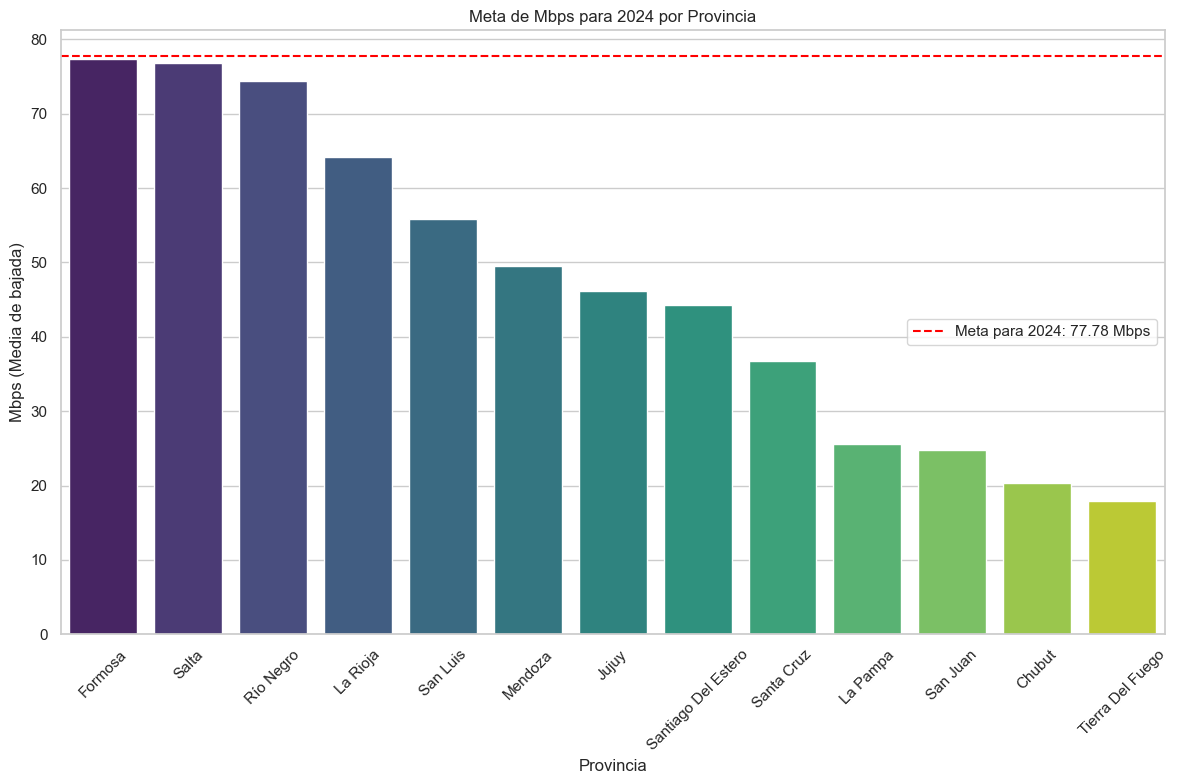

In [189]:
# Crear el gráfico
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Provincia', y='Mbps (Media de bajada)', data=provincias_por_debajo_media_2023_unicas, palette='viridis', hue='Provincia', dodge=False, legend=False)

# Añadir la meta como una línea en el gráfico
ax.axhline(media_nacional_mbps_2023, ls='--', color='red', label=f'Meta para 2024: {media_nacional_mbps_2023:.2f} Mbps')

# Añadir las etiquetas de aumento necesario
for i, row in provincias_por_debajo_media_2023_unicas.iterrows():
    aumento_necesario = media_nacional_mbps_2023 - row['Mbps (Media de bajada)']
    ax.annotate(f'{aumento_necesario:.2f}', 
                xy=(i, row['Mbps (Media de bajada)'] + 1), 
                ha='center', color='black', fontsize=5, weight='bold')

# Ajustar los títulos y las etiquetas
ax.set_title('Meta de Mbps para 2024 por Provincia')
ax.set_ylabel('Mbps (Media de bajada)')
ax.set_xlabel('Provincia')
ax.legend()

# Mostrar el gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


En el grafico de este KPI podemos ver cuales son las provincias que estan por debajo de la media nacional y el objetivo a alcanzar por el proximo ano. 
### Provincias como Catamarca, Chaco, y Chubut tienen velocidades de bajada significativamente menores que la media nacional. Estas provincias necesitarán aumentar su velocidad de bajada en varios Mbps para alcanzar la meta establecida para 2024.

#### Evaluación de infraestructura:

Realizar una evaluación detallada de la infraestructura de Internet en las provincias con menores velocidades.
Identificar los cuellos de botella y las áreas que requieren inversiones prioritarias.

#### Inversión en tecnología:

Fomentar la inversión en tecnologías avanzadas como la fibra óptica, especialmente en áreas rurales y menos desarrolladas.
Establecer incentivos para los proveedores de servicios de Internet que inviertan en mejorar la infraestructura en estas provincias.

#### Programas de subsidios:

Implementar programas de subsidios para apoyar la mejora de la infraestructura de Internet en regiones desfavorecidas.
Estos subsidios pueden estar dirigidos tanto a proveedores de servicios de Internet como a los consumidores finales.

#### Monitoreo continuo:

Establecer un sistema de monitoreo continuo para evaluar el progreso hacia la meta de 2024.
Publicar informes periódicos para mantener la transparencia y la rendición de cuentas.

#### Educación y concienciación:

Lanzar campañas de educación y concienciación para informar a las comunidades sobre los beneficios de mejorar la infraestructura de Internet.
Involucrar a las comunidades locales en el proceso de planificación y mejora de las conexiones.


### Uno penetracion poblacion y penetracion hogar en un unico df para ver la penetracion total y luego exploro el df

In [190]:
# unimos penetracion por hogar y por habitantes
penetracion = pen_pob.merge(pen_hog, on=['Año', 'Provincia', 'Trimestre'], how = 'outer')
penetracion.head(2)

,Año,Trimestre,Provincia,Accesos por cada 100 hab,Accesos por cada 100 hogares
0,2014,1,Buenos Aires,16.692346,54.570073
1,2014,2,Buenos Aires,16.794925,55.061417


In [191]:
penetracion.dtypes

Año                               int64
Trimestre                         int64
Provincia                        object
Accesos por cada 100 hab        float64
Accesos por cada 100 hogares    float64
dtype: object

In [192]:
penetracion.isnull().sum()

Año                             0
Trimestre                       0
Provincia                       0
Accesos por cada 100 hab        0
Accesos por cada 100 hogares    0
dtype: int64

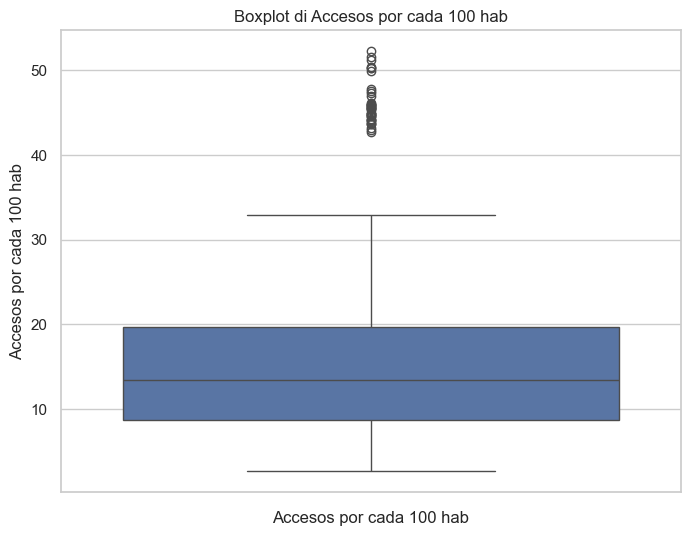

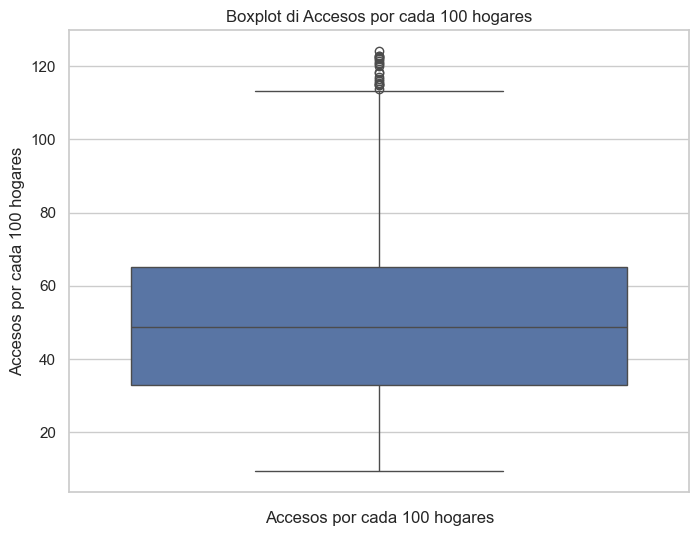

In [193]:
# Boxplot per 'Accesos por cada 100 hab'
plt.figure(figsize=(8, 6))
sns.boxplot(data=penetracion['Accesos por cada 100 hab'])
plt.title('Boxplot di Accesos por cada 100 hab')
plt.xlabel('Accesos por cada 100 hab')
plt.show()

# Boxplot per 'Accesos por cada 100 hogares'
plt.figure(figsize=(8, 6))
sns.boxplot(data=penetracion['Accesos por cada 100 hogares'])
plt.title('Boxplot di Accesos por cada 100 hogares')
plt.xlabel('Accesos por cada 100 hogares')
plt.show()

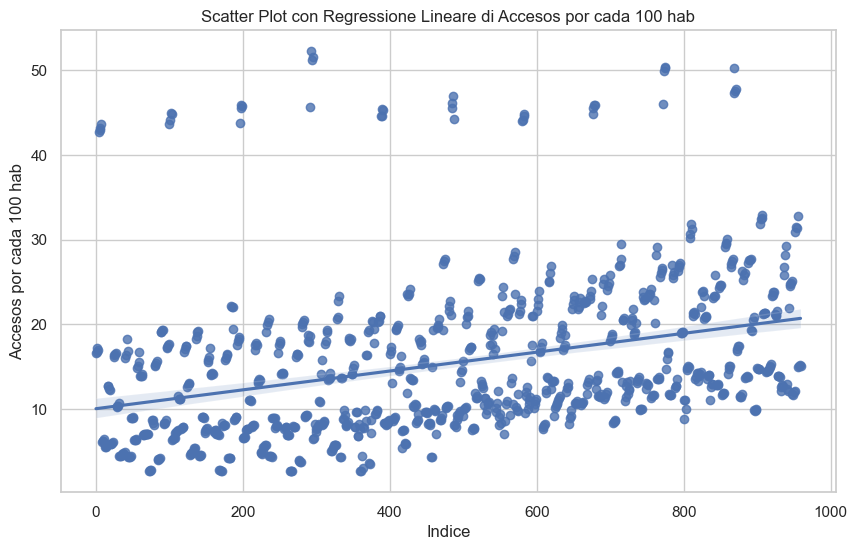

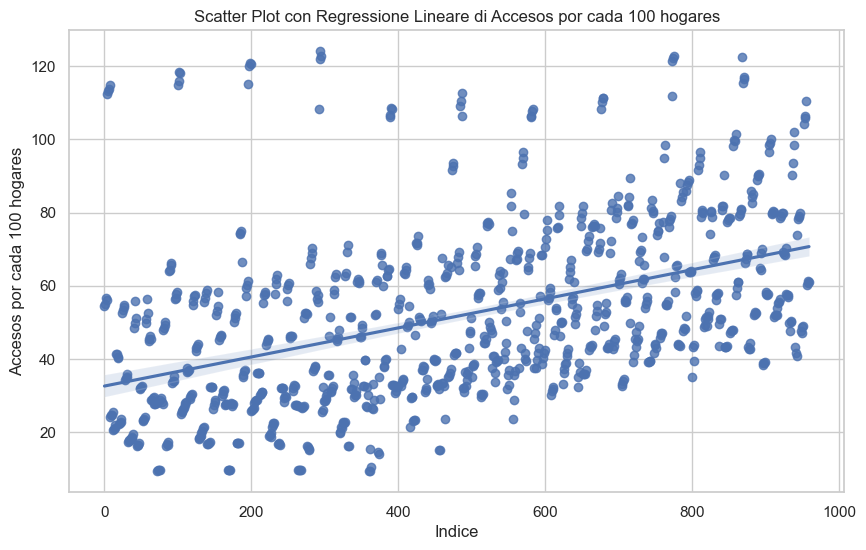

In [194]:
plt.figure(figsize=(10, 6))
sns.regplot(x=penetracion.index, y='Accesos por cada 100 hab', data=penetracion)
plt.title('Scatter Plot con Regressione Lineare di Accesos por cada 100 hab')
plt.xlabel('Indice')
plt.ylabel('Accesos por cada 100 hab')
plt.show()

plt.figure(figsize=(10, 6))
sns.regplot(x=penetracion.index, y='Accesos por cada 100 hogares', data=penetracion)
plt.title('Scatter Plot con Regressione Lineare di Accesos por cada 100 hogares')
plt.xlabel('Indice')
plt.ylabel('Accesos por cada 100 hogares')
plt.show()


De estos graficos se nota que casi todos los valores son outliers. Podria significar que el acceso a internet no tiene un valor medio a nivel nacional, sino cambia mucho de zona a zona. hay que destacar, pero, que a pesar del descostarse de los valores de la media, parecen seguir una tendencia comun o sea suben

In [195]:
penetracion.to_csv('penetracion.csv')

### Calculo del KPI PROPUESTO: Aumentar en un 2% el acceso al servicio de internet para el próximo trimestre, cada 100 hogares, por provincia

In [196]:
# Calcular el nuevo acceso proyectado
penetracion['Nuevo_Acceso_por_100_hogares'] = penetracion['Accesos por cada 100 hogares'] * 1.02

# Mostrar los primeros registros para verificar
penetracion.head()


,Año,Trimestre,Provincia,Accesos por cada 100 hab,Accesos por cada 100 hogares,Nuevo_Acceso_por_100_hogares
0,2014,1,Buenos Aires,16.692346,54.570073,55.661474
1,2014,2,Buenos Aires,16.794925,55.061417,56.162645
2,2014,3,Buenos Aires,17.262998,56.754739,57.889834
3,2014,4,Buenos Aires,17.014763,56.094337,57.216223
4,2014,1,Capital Federal,42.655072,112.254123,114.499205


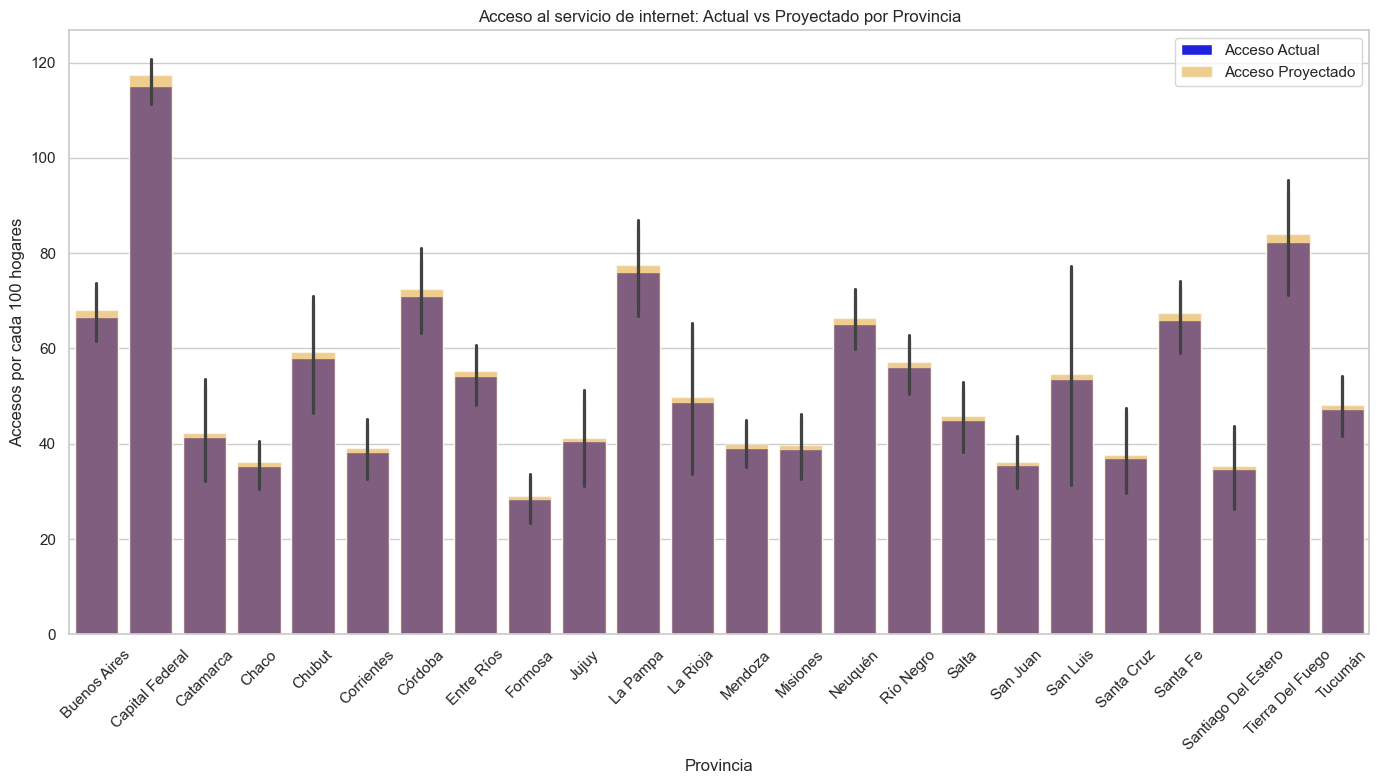

In [197]:
# Filtrar solo el último trimestre para la comparación
ultimo_trimestre = penetracion[penetracion['Trimestre'] == penetracion['Trimestre'].max()]

plt.figure(figsize=(14, 8))
sns.barplot(x='Provincia', y='Accesos por cada 100 hogares', data=ultimo_trimestre, color='blue', label='Acceso Actual')
sns.barplot(x='Provincia', y='Nuevo_Acceso_por_100_hogares', data=ultimo_trimestre, color='orange', alpha=0.5, label='Acceso Proyectado')

plt.title('Acceso al servicio de internet: Actual vs Proyectado por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Accesos por cada 100 hogares')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


### Conclusiones Basadas en el KPI Calculado:
#### Evaluación del Cumplimiento del Objetivo:

Cumplimiento del Objetivo del 2%: Si la mayoría de las provincias han alcanzado o superado el aumento del 2% en acceso a internet, se puede concluir que las estrategias implementadas están siendo efectivas.
Incumplimiento del Objetivo: Si varias provincias no han alcanzado el aumento del 2%, se debe investigar qué factores están impidiendo el crecimiento esperado.

#### Identificación de Áreas con Mayor y Menor Crecimiento:

Áreas con Mayor Crecimiento: Provincias que muestran un crecimiento significativamente mayor al 2% pueden estar beneficiándose de mejoras en infraestructura, políticas locales favorables, o una mayor demanda de servicios de internet. Estas áreas representan oportunidades de expansión y desarrollo continuo.
Áreas con Menor Crecimiento o Decrecimiento: Provincias que no alcanzan el 2% de crecimiento o incluso muestran un decrecimiento necesitan atención especial. Pueden estar enfrentando desafíos como falta de infraestructura, problemas económicos, o baja adopción tecnológica.

#### Comparación Interprovincial:

Comparación entre Provincias: Analizar cómo se comparan las provincias entre sí puede revelar desigualdades en el acceso a internet. Provincias con acceso significativamente menor pueden necesitar estrategias personalizadas para mejorar la penetración del servicio.

#### Tendencias y Patrones:

Tendencias Generales: Observar tendencias generales en el acceso a internet puede ayudar a identificar patrones. Por ejemplo, si ciertas regiones geográficas muestran consistentemente bajo crecimiento, esto puede indicar una necesidad de enfoques regionales específicos.

#### Exploro el df ingresos


In [198]:
ingresos.head()

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2023,4,1.673760e+08,Oct-Dic 2023
1,2023,3,1.331066e+08,Jul-Sept 2023
2,2023,2,1.180603e+08,Jun-Mar 2023
3,2033,1,1.041350e+08,Ene-Mar 2023
4,2022,4,7.244348e+07,Oct-Dic 2022


In [199]:
ingresos.dtypes

Año                            int64
Trimestre                      int64
Ingresos (miles de pesos)    float64
Periodo                       object
dtype: object

In [200]:
ingresos.isnull().sum()

Año                          0
Trimestre                    0
Ingresos (miles de pesos)    0
Periodo                      0
dtype: int64

lo mejor seria dolarizar el peso, para que la inflaccion no afecte a la hora de calcular 

In [201]:
#cambiar el tipo de dato ano(int) a str
ingresos['Año_string'] = ingresos['Año'].astype(str)

# Verificar el tipo de dato resultante
ingresos.dtypes

Año                            int64
Trimestre                      int64
Ingresos (miles de pesos)    float64
Periodo                       object
Año_string                    object
dtype: object

In [202]:
# Diccionario de cambios
exchange_rates = {
    '2023': 295,  
    '2022': 130,
    '2021': 95,
    '2020': 69,
    '2019': 48,
    '2018': 28,
    '2017': 16,
    '2016': 14,
    '2015': 9, 
    '2014': 9
}

In [203]:
exchange_rates

{'2023': 295,
 '2022': 130,
 '2021': 95,
 '2020': 69,
 '2019': 48,
 '2018': 28,
 '2017': 16,
 '2016': 14,
 '2015': 9,
 '2014': 9}

In [204]:
ingresos_usd = ingresos.copy()

# Crear una nueva columna 'Tipo de cambio' usando .map con el diccionario de tipos de cambio
ingresos_usd['Cambio'] = ingresos_usd['Año_string'].map(exchange_rates)

# Calcular los ingresos en USD usando la columna 'Ingresos (miles de pesos)' y 'Tipo de cambio'
ingresos_usd['Ingresos (USD)'] = ingresos_usd['Ingresos (miles de pesos)'] / ingresos_usd['Cambio']


In [205]:
ingresos_usd.head()

,Año,Trimestre,Ingresos (miles de pesos),Periodo,Año_string,Cambio,Ingresos (USD)
0,2023,4,1.673760e+08,Oct-Dic 2023,2023,295.0,567376.321356
1,2023,3,1.331066e+08,Jul-Sept 2023,2023,295.0,451208.791220
2,2023,2,1.180603e+08,Jun-Mar 2023,2023,295.0,400204.339932
3,2033,1,1.041350e+08,Ene-Mar 2023,2033,NaN,NaN
4,2022,4,7.244348e+07,Oct-Dic 2022,2022,130.0,557257.561455


In [206]:
ingresos_usd = ingresos_usd.dropna()
ingresos_usd.head()

,Año,Trimestre,Ingresos (miles de pesos),Periodo,Año_string,Cambio,Ingresos (USD)
0,2023,4,1.673760e+08,Oct-Dic 2023,2023,295.0,567376.321356
1,2023,3,1.331066e+08,Jul-Sept 2023,2023,295.0,451208.791220
2,2023,2,1.180603e+08,Jun-Mar 2023,2023,295.0,400204.339932
4,2022,4,7.244348e+07,Oct-Dic 2022,2022,130.0,557257.561455
5,2022,3,6.408678e+07,Jul-Sept 2022,2022,130.0,492975.264081


In [207]:
ingresos_usd.isnull().sum()

Año                          0
Trimestre                    0
Ingresos (miles de pesos)    0
Periodo                      0
Año_string                   0
Cambio                       0
Ingresos (USD)               0
dtype: int64

In [208]:
ingresos_usd.dtypes

Año                            int64
Trimestre                      int64
Ingresos (miles de pesos)    float64
Periodo                       object
Año_string                    object
Cambio                       float64
Ingresos (USD)               float64
dtype: object

In [209]:
ingresos_usd = ingresos_usd.drop(columns=['Año_string'])


In [139]:
ingresos_usd.to_csv('ingresos_usd.csv')

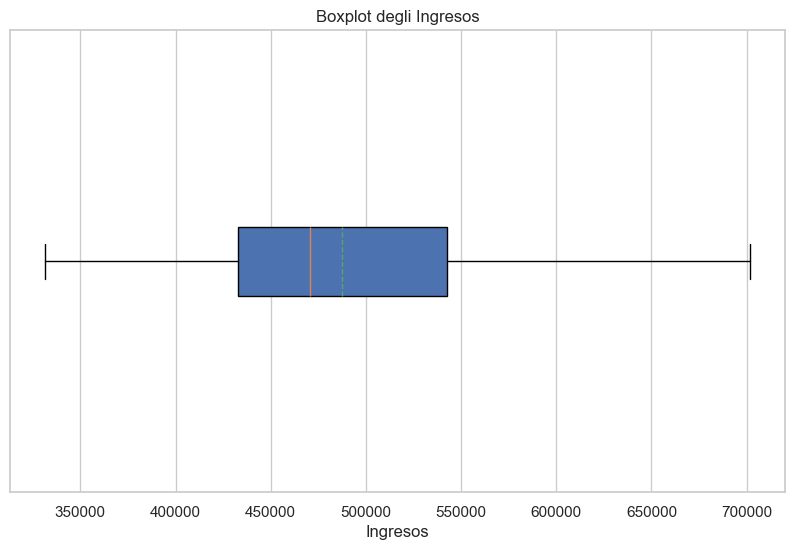

In [210]:
#definiir outliers
plt.figure(figsize=(10, 6))
plt.title('Boxplot degli Ingresos')
plt.xlabel('Ingresos')
plt.boxplot(ingresos_usd['Ingresos (USD)'], vert=False, patch_artist=True, meanline=True, showmeans=True)
plt.yticks([])
plt.show()

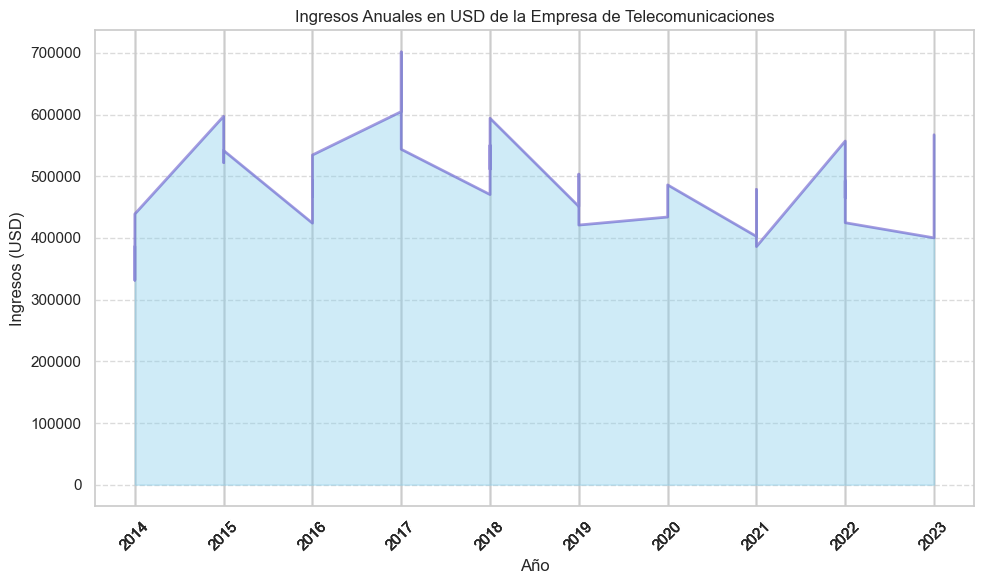

In [211]:
# Ordenar los datos por año para asegurar que el gráfico muestre los datos en orden temporal
ingresos_usd = ingresos_usd.sort_values(by='Año')


# Crear el gráfico de área
plt.figure(figsize=(10, 6))
plt.fill_between(ingresos_usd['Año'], ingresos_usd['Ingresos (USD)'], color='skyblue', alpha=0.4)
plt.plot(ingresos_usd['Año'], ingresos_usd['Ingresos (USD)'], color='Slateblue', alpha=0.6, linewidth=2)

# Personalizar el gráfico
plt.title('Ingresos Anuales en USD de la Empresa de Telecomunicaciones')
plt.xlabel('Año')
plt.ylabel('Ingresos (USD)')
plt.xticks(ingresos_usd['Año'], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()


La grafica propuesta no es perfecta porque siempre hay que tener a mente el cambio que hemos actuado para la dolarizacion (usamos el promedio del cambio y no el cambio efectivo)

Voy a agrupar los datos de ingresos de cada ano para que se vean mas claros los ingresos totales para cada ano

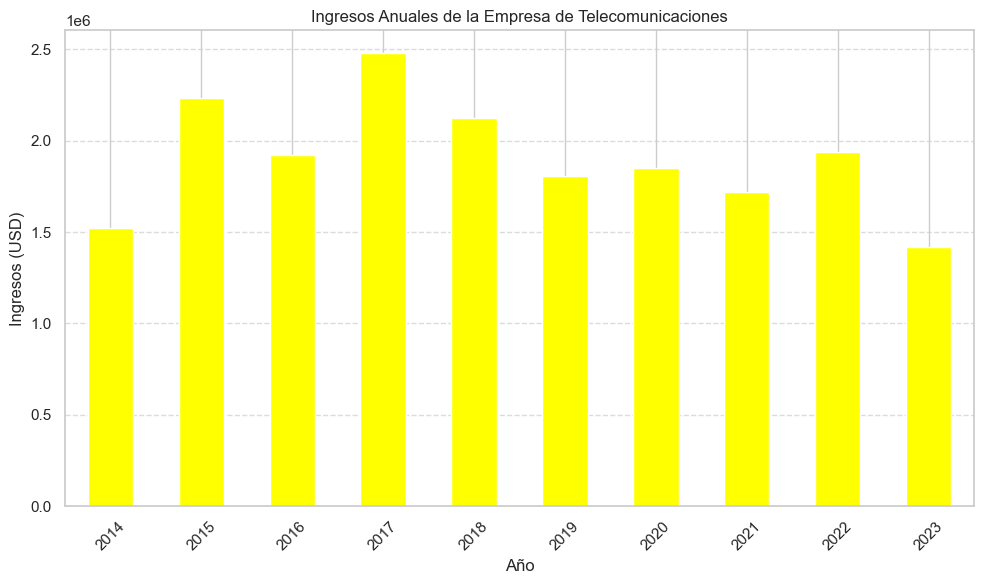

In [212]:
# Convertir 'Año' y 'Ingresos' a tipo numérico para asegurar la correcta ordenación
ingresos_usd['Año'] = pd.to_numeric(ingresos_usd['Año'])
ingresos_usd['Ingresos (USD)'] = pd.to_numeric(ingresos_usd['Ingresos (USD)'])

# Agrupar por año y sumar los ingresos
ingresos_anuales = ingresos_usd.groupby('Año')['Ingresos (USD)'].sum()

# Crear la gráfica de barras
plt.figure(figsize=(10, 6))
ingresos_anuales.plot(kind='bar', color='yellow')
plt.title('Ingresos Anuales de la Empresa de Telecomunicaciones')
plt.xlabel('Año')
plt.ylabel('Ingresos (USD)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Se puede notar que los ingresos en los anos no tienen andamento estable. De echo el 2023 ha sido el ano donde menos ingresos se generaron. Hay que tener a mente que hemos transformado los pesos en dolares segun el promedio por ano, y esto tambien podria afectar la visualizacion(vista la fuerte inflacion que ha afectado el Pais durante estos anos). Sin embargo vamos a crear un nuevo KPI: 

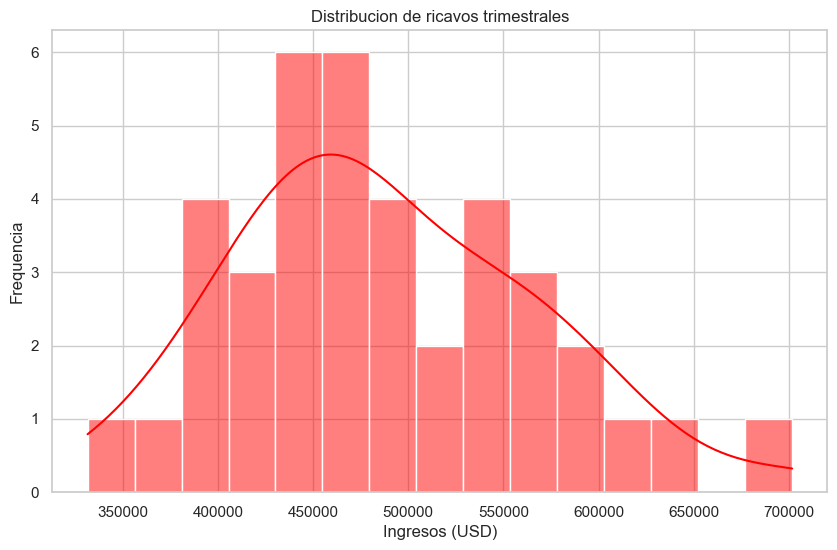

In [213]:
# Distribuzione dei ricavi trimestrali
plt.figure(figsize=(10, 6))
sns.histplot(ingresos_usd['Ingresos (USD)'], bins=15, kde=True, color = 'red')
plt.title('Distribucion de ricavos trimestrales')
plt.xlabel('Ingresos (USD)')
plt.ylabel('Frequencia')
plt.show()


In [214]:
ingresos_usd.head()

,Año,Trimestre,Ingresos (miles de pesos),Periodo,Cambio,Ingresos (USD)
37,2014,3,3.478638e+06,Jul-Sept 2014,9.0,386515.304756
38,2014,2,3.270816e+06,Abr-Jun 2014,9.0,363424.022657
39,2014,1,2.984054e+06,Ene-Mar 2014,9.0,331561.578753
36,2014,4,3.950441e+06,Oct-Dic 2014,9.0,438937.864486
32,2015,4,5.376899e+06,Oct-Dic 2015,9.0,597433.245111


#### Exploro acc_vel

In [216]:
acc_vel.dtypes

Año                      int64
Trimestre                int64
Provincia               object
HASTA 512 kbps         float64
+ 512 Kbps - 1 Mbps    float64
+ 1 Mbps - 6 Mbps      float64
+ 6 Mbps - 10 Mbps     float64
+ 10 Mbps - 20 Mbps    float64
+ 20 Mbps - 30 Mbps    float64
+ 30 Mbps              float64
OTROS                  float64
Total                  float64
dtype: object

In [217]:
acc_vel.head()

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2024,4,Buenos Aires,26909.0,23962.0,228393.0,239339.0,246144.0,110876.0,4042646.0,93351.0,5011620.0
1,2024,4,Capital Federal,516.0,4544.0,26409.0,48083.0,33925.0,5829.0,1355061.0,0.0,1474367.0
2,2024,4,Catamarca,71.0,209.0,3065.0,3734.0,4423.0,1827.0,61181.0,77.0,74587.0
3,2024,4,Chaco,236.0,477.0,14811.0,10361.0,6247.0,5729.0,105485.0,4040.0,147386.0
4,2024,4,Chubut,111.0,1088.0,44276.0,31402.0,22843.0,20196.0,33665.0,16589.0,170170.0


In [218]:
# Reemplazar '2024' por '2023' en la columna 'Año'
acc_vel['Año'] = acc_vel['Año'].replace(2024, 2023)
acc_vel.head()

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2023,4,Buenos Aires,26909.0,23962.0,228393.0,239339.0,246144.0,110876.0,4042646.0,93351.0,5011620.0
1,2023,4,Capital Federal,516.0,4544.0,26409.0,48083.0,33925.0,5829.0,1355061.0,0.0,1474367.0
2,2023,4,Catamarca,71.0,209.0,3065.0,3734.0,4423.0,1827.0,61181.0,77.0,74587.0
3,2023,4,Chaco,236.0,477.0,14811.0,10361.0,6247.0,5729.0,105485.0,4040.0,147386.0
4,2023,4,Chubut,111.0,1088.0,44276.0,31402.0,22843.0,20196.0,33665.0,16589.0,170170.0


In [219]:
acc_vel.isnull().sum()

Año                    0
Trimestre              0
Provincia              0
HASTA 512 kbps         0
+ 512 Kbps - 1 Mbps    0
+ 1 Mbps - 6 Mbps      0
+ 6 Mbps - 10 Mbps     0
+ 10 Mbps - 20 Mbps    0
+ 20 Mbps - 30 Mbps    0
+ 30 Mbps              0
OTROS                  6
Total                  0
dtype: int64

In [220]:
acc_vel = acc_vel.drop(['OTROS'], axis=1)

In [221]:
acc_vel.describe()

,Año,Trimestre,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,Total
count,960.000000,960.000000,960.000000,960.000000,9.600000e+02,960.000000,960.000000,960.000000,9.600000e+02,9.600000e+02
mean,2018.500000,2.500000,1986.276042,9291.107292,1.371885e+05,38112.431250,37303.288542,20197.090625,1.098851e+05,3.600074e+05
std,2.873778,1.118617,12889.165297,21018.938200,3.281748e+05,64565.358974,89536.515407,70534.758485,4.347858e+05,7.740852e+05
min,2014.000000,1.000000,6.000000,0.000000,1.483000e+03,0.000000,0.000000,0.000000,0.000000e+00,1.240600e+04
25%,2016.000000,1.750000,40.750000,347.250000,2.451150e+04,3581.000000,2127.500000,36.750000,1.075000e+01,5.882400e+04
50%,2018.500000,2.500000,107.000000,2263.500000,4.425400e+04,12913.500000,10082.000000,1391.500000,2.418500e+03,1.097050e+05
75%,2021.000000,3.250000,468.000000,7227.500000,8.439500e+04,40126.000000,26436.000000,9858.750000,3.533225e+04,1.880792e+05
max,2023.000000,4.000000,238920.000000,171244.480000,2.299705e+06,403575.000000,886678.000000,949093.000000,4.042646e+06,5.011620e+06


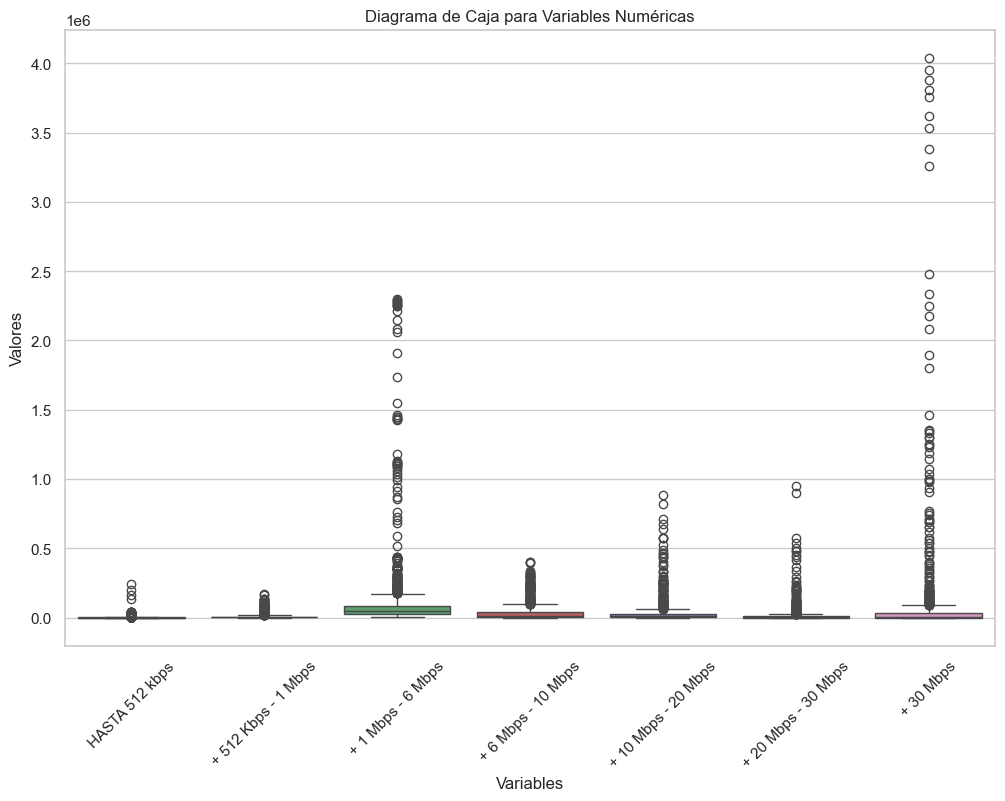

In [222]:
# Crear un boxplot para cada columna numérica relevante
plt.figure(figsize=(12, 8))
sns.boxplot(data=acc_vel.drop(['Año', 'Trimestre', 'Provincia', 'Total'], axis=1))  # Excluir columnas no numéricas
plt.title('Diagrama de Caja para Variables Numéricas')
plt.xlabel('Variables')
plt.ylabel('Valores')
plt.xticks(rotation=45)
plt.show()

Quiero investigar sobre las provincias que tienen accesso hasta 1 mbps, ya que es una velocidad muy muy baja, y se podria implementar.

In [223]:
# Seleccionar solo las columnas relacionadas con velocidades hasta 1 Mbps
df_hasta_1mbps = acc_vel[['Año', 'Trimestre', 'Provincia', 'HASTA 512 kbps', '+ 512 Kbps - 1 Mbps']]
df_hasta_1mbps.head()

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps
0,2023,4,Buenos Aires,26909.0,23962.0
1,2023,4,Capital Federal,516.0,4544.0
2,2023,4,Catamarca,71.0,209.0
3,2023,4,Chaco,236.0,477.0
4,2023,4,Chubut,111.0,1088.0


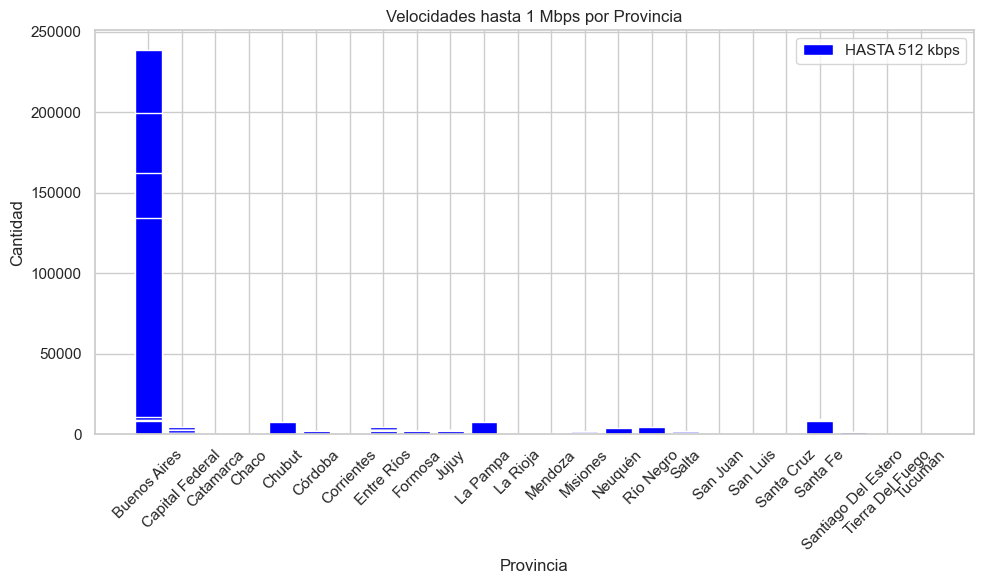

In [224]:
# Visualización de los datos usando gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(df_hasta_1mbps['Provincia'], df_hasta_1mbps['HASTA 512 kbps'], label='HASTA 512 kbps', color = 'blue')
plt.xlabel('Provincia')
plt.ylabel('Cantidad')
plt.title('Velocidades hasta 1 Mbps por Provincia')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [225]:
# Escludere Buenos Aires per una visualizzazione più chiara
df_hasta_1mbps = df_hasta_1mbps[df_hasta_1mbps['Provincia'] != 'Buenos Aires']

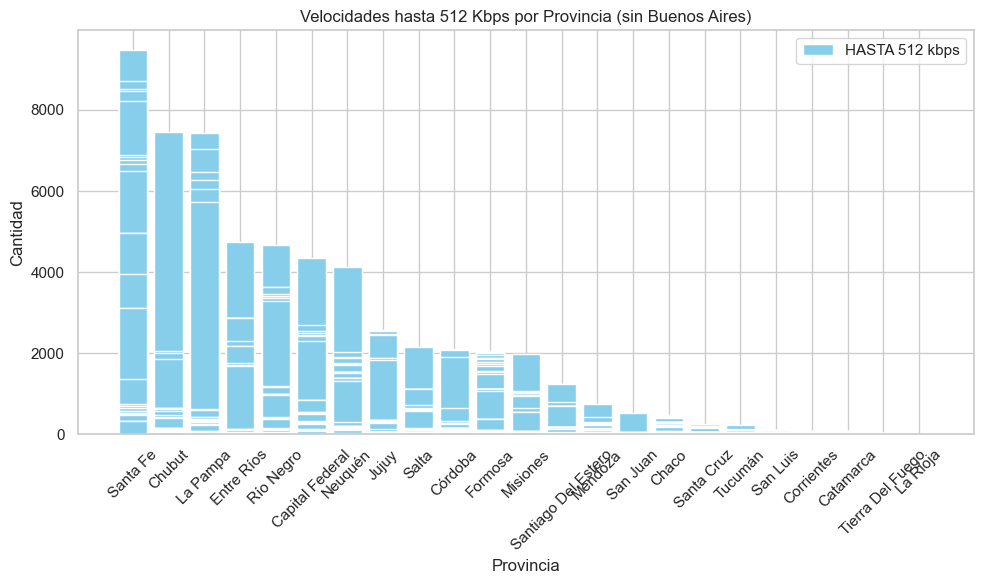

In [226]:
df_hasta_1mbps = df_hasta_1mbps.sort_values(('HASTA 512 kbps'), ascending=False).reset_index(drop=True)
# Grafico di barre
plt.figure(figsize=(10, 6))
plt.bar(df_hasta_1mbps['Provincia'], df_hasta_1mbps['HASTA 512 kbps'], label='HASTA 512 kbps', color='skyblue')
plt.xlabel('Provincia')
plt.ylabel('Cantidad')
plt.title('Velocidades hasta 512 Kbps por Provincia (sin Buenos Aires)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Union de todos los df, menos ingresos, para sacar un nuevo kpi

### EXPLORO Acc_tec

In [227]:
acc_tec = pd.read_csv('acc_tec.csv')
acc_tec.isnull().sum()

Unnamed: 0      0
Año             3
Trimestre       3
Provincia       4
ADSL            4
Cablemodem      4
Fibra óptica    4
Wireless        4
Otros           4
Total           4
dtype: int64

In [228]:
acc_tec['Año'] = acc_tec['Año'].replace('2019 *', '2019')
acc_tec = acc_tec.iloc[:-4]
acc_tec

,Unnamed: 0,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,0,2023.0,4.0,Buenos Aires,223391.0,2797700.0,1784593.0,137993.0,67943.0,5011620.0
1,1,2023.0,4.0,Capital Federal,58700.0,1198835.0,182520.0,4492.0,29820.0,1474367.0
2,2,2023.0,4.0,Catamarca,6669.0,11016.0,55437.0,1384.0,81.0,74587.0
3,3,2023.0,4.0,Chaco,14000.0,60277.0,62301.0,8404.0,2404.0,147386.0
4,4,2023.0,4.0,Chubut,26306.0,77217.0,26174.0,30543.0,9930.0,170170.0
...,...,...,...,...,...,...,...,...,...,...
955,955,2014.0,1.0,Santa Cruz,18927.0,100.0,381.0,4092.0,3264.0,26764.0
956,956,2014.0,1.0,Santa Fe,322662.0,174296.0,3059.0,5951.0,644.0,506612.0
957,957,2014.0,1.0,Santiago Del Estero,32567.0,3598.0,19.0,915.0,34.0,37133.0
958,958,2014.0,1.0,Tierra Del Fuego,21618.0,2837.0,648.0,1.0,2934.0,28038.0


In [229]:
acc_tec['Trimestre'] = acc_tec['Trimestre'].replace('3 *', '3')
acc_tec['Trimestre'] = acc_tec['Trimestre'].replace('2 *', '2')
acc_tec['Trimestre'] = acc_tec['Trimestre'].replace('1 *', '1')
acc_tec.dropna
acc_tec.isnull().sum()
acc_tec

,Unnamed: 0,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,0,2023.0,4.0,Buenos Aires,223391.0,2797700.0,1784593.0,137993.0,67943.0,5011620.0
1,1,2023.0,4.0,Capital Federal,58700.0,1198835.0,182520.0,4492.0,29820.0,1474367.0
2,2,2023.0,4.0,Catamarca,6669.0,11016.0,55437.0,1384.0,81.0,74587.0
3,3,2023.0,4.0,Chaco,14000.0,60277.0,62301.0,8404.0,2404.0,147386.0
4,4,2023.0,4.0,Chubut,26306.0,77217.0,26174.0,30543.0,9930.0,170170.0
...,...,...,...,...,...,...,...,...,...,...
955,955,2014.0,1.0,Santa Cruz,18927.0,100.0,381.0,4092.0,3264.0,26764.0
956,956,2014.0,1.0,Santa Fe,322662.0,174296.0,3059.0,5951.0,644.0,506612.0
957,957,2014.0,1.0,Santiago Del Estero,32567.0,3598.0,19.0,915.0,34.0,37133.0
958,958,2014.0,1.0,Tierra Del Fuego,21618.0,2837.0,648.0,1.0,2934.0,28038.0


In [230]:
acc_tec = acc_tec.drop(columns = ['Unnamed: 0'])
acc_tec

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2023.0,4.0,Buenos Aires,223391.0,2797700.0,1784593.0,137993.0,67943.0,5011620.0
1,2023.0,4.0,Capital Federal,58700.0,1198835.0,182520.0,4492.0,29820.0,1474367.0
2,2023.0,4.0,Catamarca,6669.0,11016.0,55437.0,1384.0,81.0,74587.0
3,2023.0,4.0,Chaco,14000.0,60277.0,62301.0,8404.0,2404.0,147386.0
4,2023.0,4.0,Chubut,26306.0,77217.0,26174.0,30543.0,9930.0,170170.0
...,...,...,...,...,...,...,...,...,...
955,2014.0,1.0,Santa Cruz,18927.0,100.0,381.0,4092.0,3264.0,26764.0
956,2014.0,1.0,Santa Fe,322662.0,174296.0,3059.0,5951.0,644.0,506612.0
957,2014.0,1.0,Santiago Del Estero,32567.0,3598.0,19.0,915.0,34.0,37133.0
958,2014.0,1.0,Tierra Del Fuego,21618.0,2837.0,648.0,1.0,2934.0,28038.0


In [231]:
acc_tec['Año'] = acc_tec['Año'].astype(str).apply(lambda x: x.split('.')[0])
acc_tec['Trimestre'] = acc_tec['Trimestre'].astype(str).apply(lambda x: x.split('.')[0])

# Ora converte 'Año' e 'Trimestre' in interi
acc_tec['Año'] = acc_tec['Año'].astype(int)
acc_tec['Trimestre'] = acc_tec['Trimestre'].astype(int)

# Verifica il risultato
print(acc_tec.dtypes)

Año               int64
Trimestre         int64
Provincia        object
ADSL            float64
Cablemodem      float64
Fibra óptica    float64
Wireless        float64
Otros           float64
Total           float64
dtype: object


In [232]:
#unimos todos los DF(menos ingresos) 
df_accessos = acc_vel.merge(vel_perc, on=['Provincia', 'Trimestre', 'Año'], how='outer')
df_accessos= df_accessos.merge(penetracion, on= ['Provincia', 'Trimestre', 'Año'], how='outer')
df_accessos = df_accessos.merge(acc_tec, on= ['Provincia', 'Trimestre', 'Año'], how='outer')
df_accessos.head()

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,...,Mbps (Media de bajada),Accesos por cada 100 hab,Accesos por cada 100 hogares,Nuevo_Acceso_por_100_hogares,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total_y
0,2021,1,Buenos Aires,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,629679.0,2452056.0,821597.0,98806.0,57864.0,4060002.0
1,2021,2,Buenos Aires,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,603255.0,2503830.0,854173.0,113546.0,57547.0,4132351.0
2,2022,2,Buenos Aires,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,350652.0,2719613.0,1399043.0,126847.0,71028.0,4667183.0
3,2021,3,Buenos Aires,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,585729.0,2595485.0,885613.0,120228.0,64554.0,4251609.0
4,2021,1,Formosa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,20663.0,11412.0,2562.0,15669.0,380.0,50686.0


In [233]:
print(df_accessos)
df_accessos.isnull().sum()
df_accessos = df_accessos.dropna(inplace=True)



      Año  Trimestre       Provincia  HASTA 512 kbps  + 512 Kbps - 1 Mbps  \
0    2021          1   Buenos Aires              NaN                  NaN   
1    2021          2   Buenos Aires              NaN                  NaN   
2    2022          2   Buenos Aires              NaN                  NaN   
3    2021          3   Buenos Aires              NaN                  NaN   
4    2021          1        Formosa              NaN                  NaN   
..    ...        ...             ...             ...                  ...   
975  2019          4         Tucumán            55.0                  0.0   
976  2020          4         Tucumán            29.0                 97.0   
977  2021          4         Tucumán            39.0                 97.0   
978  2022          4         Tucumán            39.0               1562.0   
979  2023          4         Tucumán            39.0               1089.0   

     + 1 Mbps - 6 Mbps  + 6 Mbps - 10 Mbps  + 10 Mbps - 20 Mbps  \
0       

In [234]:
#unimos todos los DF(menos ingresos) 
df_accessos = acc_vel.merge(vel_perc, on=['Provincia', 'Trimestre', 'Año'], how='outer')
df_accessos= df_accessos.merge(penetracion, on= ['Provincia', 'Trimestre', 'Año'], how='outer')
df_accessos.head() 
df_accessos = df_accessos.merge(acc_tec, on= ['Provincia', 'Trimestre', 'Año'], how='outer')
df_accessos.head()

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,...,Mbps (Media de bajada),Accesos por cada 100 hab,Accesos por cada 100 hogares,Nuevo_Acceso_por_100_hogares,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total_y
0,2021,1,Buenos Aires,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,629679.0,2452056.0,821597.0,98806.0,57864.0,4060002.0
1,2021,2,Buenos Aires,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,603255.0,2503830.0,854173.0,113546.0,57547.0,4132351.0
2,2022,2,Buenos Aires,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,350652.0,2719613.0,1399043.0,126847.0,71028.0,4667183.0
3,2021,3,Buenos Aires,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,585729.0,2595485.0,885613.0,120228.0,64554.0,4251609.0
4,2021,1,Formosa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,20663.0,11412.0,2562.0,15669.0,380.0,50686.0


In [235]:
df_accessos = df_accessos.fillna(0)

In [236]:
df_accessos = df_accessos.round(2)
df_accessos

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,...,Mbps (Media de bajada),Accesos por cada 100 hab,Accesos por cada 100 hogares,Nuevo_Acceso_por_100_hogares,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total_y
0,2021,1,Buenos Aires,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,629679.0,2452056.0,821597.0,98806.0,57864.0,4060002.0
1,2021,2,Buenos Aires,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,603255.0,2503830.0,854173.0,113546.0,57547.0,4132351.0
2,2022,2,Buenos Aires,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,350652.0,2719613.0,1399043.0,126847.0,71028.0,4667183.0
3,2021,3,Buenos Aires,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,585729.0,2595485.0,885613.0,120228.0,64554.0,4251609.0
4,2021,1,Formosa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,20663.0,11412.0,2562.0,15669.0,380.0,50686.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,2019,4,Tucumán,55.0,0.0,54544.0,52017.0,28916.0,6405.0,56707.0,...,29.87,11.80,47.65,48.60,146985.0,11012.0,39574.0,725.0,348.0,198644.0
976,2020,4,Tucumán,29.0,97.0,44095.0,54334.0,32155.0,4105.0,93594.0,...,36.44,13.57,54.78,55.88,149322.0,11150.0,68043.0,1834.0,740.0,231089.0
977,2021,4,Tucumán,39.0,97.0,37321.0,48736.0,21023.0,5326.0,125857.0,...,45.15,13.85,55.93,57.04,97830.0,59022.0,78790.0,2511.0,486.0,238639.0
978,2022,4,Tucumán,39.0,1562.0,29996.0,35425.0,26369.0,1375.0,153538.0,...,88.33,15.12,61.04,62.26,69441.0,20668.0,168717.0,4069.0,527.0,263422.0


In [237]:
df_accessos.drop(columns = ['Total_y'])

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,Total_x,Mbps (Media de bajada),Accesos por cada 100 hab,Accesos por cada 100 hogares,Nuevo_Acceso_por_100_hogares,ADSL,Cablemodem,Fibra óptica,Wireless,Otros
0,2021,1,Buenos Aires,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,629679.0,2452056.0,821597.0,98806.0,57864.0
1,2021,2,Buenos Aires,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,603255.0,2503830.0,854173.0,113546.0,57547.0
2,2022,2,Buenos Aires,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,350652.0,2719613.0,1399043.0,126847.0,71028.0
3,2021,3,Buenos Aires,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,585729.0,2595485.0,885613.0,120228.0,64554.0
4,2021,1,Formosa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,20663.0,11412.0,2562.0,15669.0,380.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,2019,4,Tucumán,55.0,0.0,54544.0,52017.0,28916.0,6405.0,56707.0,198644.0,29.87,11.80,47.65,48.60,146985.0,11012.0,39574.0,725.0,348.0
976,2020,4,Tucumán,29.0,97.0,44095.0,54334.0,32155.0,4105.0,93594.0,231089.0,36.44,13.57,54.78,55.88,149322.0,11150.0,68043.0,1834.0,740.0
977,2021,4,Tucumán,39.0,97.0,37321.0,48736.0,21023.0,5326.0,125857.0,238639.0,45.15,13.85,55.93,57.04,97830.0,59022.0,78790.0,2511.0,486.0
978,2022,4,Tucumán,39.0,1562.0,29996.0,35425.0,26369.0,1375.0,153538.0,263422.0,88.33,15.12,61.04,62.26,69441.0,20668.0,168717.0,4069.0,527.0


In [238]:
df_accessos = df_accessos.rename(columns={'Nuevo_Acceso_por_100_hogares': 'Accesso proyectado/100 hogares' })


In [239]:
df_accessos.dtypes

Año                                 int64
Trimestre                           int64
Provincia                          object
HASTA 512 kbps                    float64
+ 512 Kbps - 1 Mbps               float64
+ 1 Mbps - 6 Mbps                 float64
+ 6 Mbps - 10 Mbps                float64
+ 10 Mbps - 20 Mbps               float64
+ 20 Mbps - 30 Mbps               float64
+ 30 Mbps                         float64
Total_x                           float64
Mbps (Media de bajada)            float64
Accesos por cada 100 hab          float64
Accesos por cada 100 hogares      float64
Accesso proyectado/100 hogares    float64
ADSL                              float64
Cablemodem                        float64
Fibra óptica                      float64
Wireless                          float64
Otros                             float64
Total_y                           float64
dtype: object

In [240]:
df_accessos.to_csv('internet.csv')


In [243]:
internet = pd.read_csv('internet.csv')
internet.head()

,Unnamed: 0,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,...,Mbps (Media de bajada),Accesos por cada 100 hab,Accesos por cada 100 hogares,Accesso proyectado/100 hogares,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total_y
0,0,2021,1,Buenos Aires,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,629679.0,2452056.0,821597.0,98806.0,57864.0,4060002.0
1,1,2021,2,Buenos Aires,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,603255.0,2503830.0,854173.0,113546.0,57547.0,4132351.0
2,2,2022,2,Buenos Aires,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,350652.0,2719613.0,1399043.0,126847.0,71028.0,4667183.0
3,3,2021,3,Buenos Aires,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,585729.0,2595485.0,885613.0,120228.0,64554.0,4251609.0
4,4,2021,1,Formosa,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,20663.0,11412.0,2562.0,15669.0,380.0,50686.0


In [248]:
internet = internet.iloc[19:]

El incremento en el uso de la fibra óptica es un KPI muy relevante para una empresa de telecomunicaciones, ya que la fibra óptica suele representar la tecnología más avanzada y deseable para los accesos a internet debido a su alta velocidad y estabilidad. Para calcular este KPI, podemos comparar el uso de la fibra óptica en diferentes años y trimestres para identificar tendencias y crecimientos.

Implementación del KPI de Incremento en el Uso de la Fibra Óptica
El KPI del incremento en el uso de la fibra óptica puede calcularse como el porcentaje de crecimiento de los accesos de fibra óptica de un periodo a otro. Aquí presento un ejemplo de cómo se podría implementar este análisis:

Cálculo del Incremento en el Uso de la Fibra Óptica: Calcula el porcentaje de incremento de accesos de fibra óptica entre los distintos años disponibles.

Visualización del Incremento: Utiliza un gráfico para mostrar la tendencia de incremento en el uso de la fibra óptica.

In [250]:
# Filtrar por tipo de conexión 'Fibra óptica' y seleccionar las columnas relevantes
df_fibra_optica = internet[internet['Fibra óptica'] > 0][['Provincia', 'Fibra óptica']]

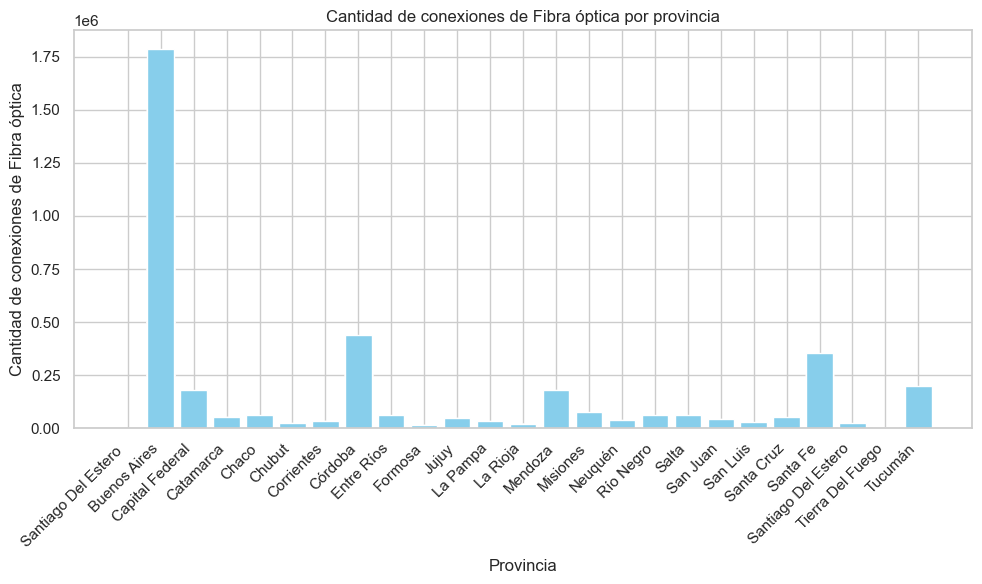

In [251]:
import matplotlib.pyplot as plt

# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Crear el gráfico de barras
plt.bar(df_fibra_optica['Provincia'], df_fibra_optica['Fibra óptica'], color='skyblue')

# Añadir etiquetas y título
plt.xlabel('Provincia')
plt.ylabel('Cantidad de conexiones de Fibra óptica')
plt.title('Cantidad de conexiones de Fibra óptica por provincia')

# Rotar las etiquetas del eje x para una mejor visualización
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


se nota que a parte Buenos Aires, el acceso a la fibra optica no esta muy bien distribuido en el Pais, en general es bastante bajo. Se podria incrementar el uso de esta tecnologia? Como?

KPI incremento Fibra = ((accesos actuales de Fibra - accesos anteriores de fibra) / accesos anteriores de fibra )
*100

In [252]:
# Filtrar por tipo de conexión 'Fibra óptica' y omitir la provincia 'Buenos Aires'
df_fibra_optica_sin_ba = internet[(internet['Fibra óptica'] > 0) & (internet['Provincia'] != 'Buenos Aires')][['Provincia', 'Fibra óptica']]


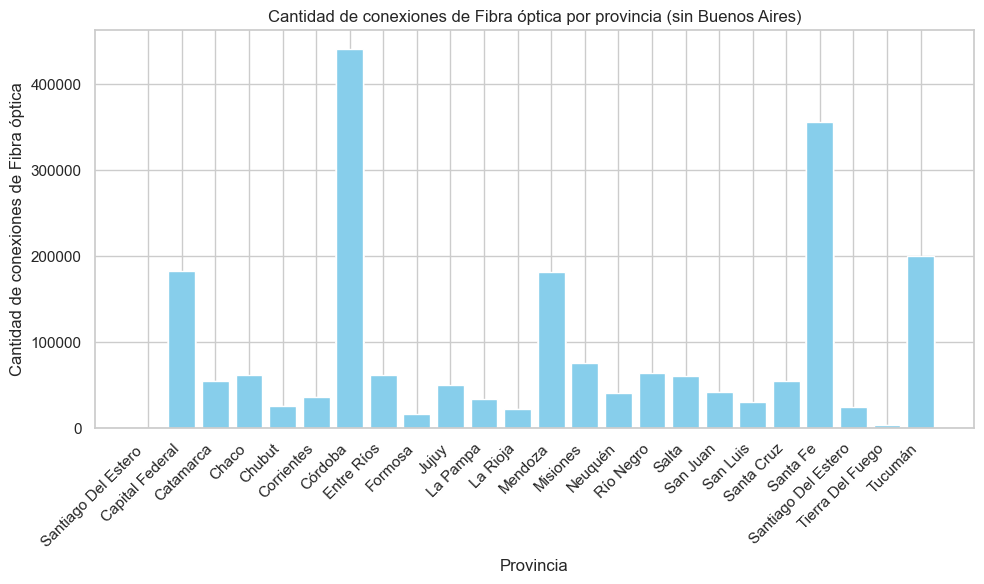

In [253]:
# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Crear el gráfico de barras
plt.bar(df_fibra_optica_sin_ba['Provincia'], df_fibra_optica_sin_ba['Fibra óptica'], color='skyblue')

# Añadir etiquetas y título
plt.xlabel('Provincia')
plt.ylabel('Cantidad de conexiones de Fibra óptica')
plt.title('Cantidad de conexiones de Fibra óptica por provincia (sin Buenos Aires)')

# Rotar las etiquetas del eje x para una mejor visualización
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


Quiero ver de cuanto fue el incremento percentual en el uso de fibra, desde el ano 2022 al 2023 para poder crear un kpi realistico

In [254]:
# Filtrare i dati per gli anni 2022 e 2023, escludendo Buenos Aires
filtro = (internet['Año'].isin([2022, 2023])) & (internet['Provincia'] != 'Buenos Aires')
df_fibra = internet.loc[filtro]

# Raggruppare per anno e calcolare il totale dell'uso della fibra ottica
df_fibra_agrupado = df_fibra.groupby('Año')['Fibra óptica'].sum()

# Calcolare l'aumento percentuale dal 2022 al 2023
fibra_2022 = df_fibra_agrupado.loc[2022]
fibra_2023 = df_fibra_agrupado.loc[2023]
aumento_percentuale = ((fibra_2023 - fibra_2022) / fibra_2022) * 100

print(f"L'incremento percentuale dell'uso della fibra ottica dal 2022 al 2023 (escludendo Buenos Aires) è: {aumento_percentuale:.2f}%")

L'incremento percentuale dell'uso della fibra ottica dal 2022 al 2023 (escludendo Buenos Aires) è: 46.01%
